In [1]:
import numpy as np
import sympy as sy
import matplotlib.cm as cm
import matplotlib.pylab as plt
from PIL import Image
import warnings
import time
import os

warnings.filterwarnings('ignore')  
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 30
from IPython.display import display, Math

# $$\textit{Hénon-Heiles}$$
Hénon-Heiles Hamiltonian $(H)$ system (which may be used as a simple model of the motion of a star inside a galaxy) given by            
                                                                                   
$ \qquad\qquad\begin{align} H &=T+V=\frac{1}{2} \big( p_x^2+p_y^2+x^2+y^2 \big) + x^2y-\frac{1}{3}y^3  \\ T &= \frac{1}{2} \big( \dot{x}^2+\dot{y}^2 \big) = \frac{1}{2} \big( p_x^2+p_y^2 \big) \\ V &= \frac{1}{2}( x^2+y^2)+x^2y+ \frac{1}{3}y^3 \\ \dot{x} &=\frac{dx}{dt}=\frac{\partial H}{\partial p_x}=p_x \\ \ddot{x} & =\dot{p_x}=\frac{dp_x}{dt}=-\frac{\partial H}{\partial x}=-\frac{\partial V}{\partial x}=-x-2xy \\ \dot{y} &=\frac{dy}{dt}=\frac{\partial H}{\partial p_y}=p_y \\ \ddot{y} &=\dot{p_y}=\frac{dp_y}{dt}=-\frac{\partial H}{\partial y}=-\frac{\partial V}{\partial y}=-y-x^2+y^2  \end{align}$

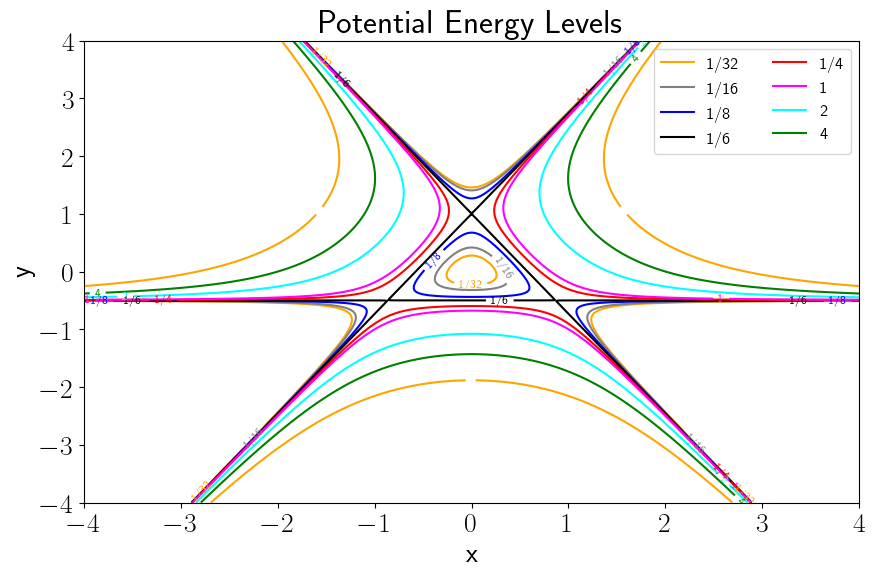

In [2]:
def V(x, y):
    return (1/2)*(x**2 + y**2) + x**2*y - y**3/3

x = np.linspace(-4,4, 400)
y = np.linspace(-4,4, 400)
X, Y = np.meshgrid(x, y)
Z = V(X, Y)

levels = [ 1/32, 1/16, 1/8, 1/6, 1/4, 1/3, 1, 2, 4]
colors = [ 'orange', 'grey', 'blue', 'black', 'red', 'magenta', 'cyan', 'green']
labels = ['1/32', '1/16', '1/8', '1/6', '1/4', '1', '2', '4']

plt.figure(figsize=(10,6))
contours = plt.contour(X, Y, Z, levels=levels, colors=colors)
plt.clabel(contours, inline=True, fontsize=8, fmt={level: label for level, label in zip(levels, labels)})
plt.xlabel('x')
plt.ylabel('y')
plt.title('Potential Energy Levels')
plt.legend([plt.Line2D([0], [0], color=color) for color in colors], labels, fontsize=12,loc='upper right', ncol=2)
plt.show()

In [3]:
def RK4(f, t_span, dt, x0, ftype):
    t = np.arange(t_span[0], t_span[1]+dt, dt)
    x_n = np.zeros((len(t), len(x0)), dtype=ftype)
    x_n[0] = x0
    for i in range(len(t)-1):
        k1 = dt * f(t[i], x_n[i])
        k2 = dt * f(t[i] + 0.5*dt, x_n[i] + 0.5*k1)
        k3 = dt * f(t[i] + 0.5*dt, x_n[i] + 0.5*k2)
        k4 = dt * f(t[i] + dt, x_n[i] + k3)
        x_n[i+1] = x_n[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
        
    return t, x_n

In [4]:
def henon_heilies(t, X0):
    x, px, y, py = X0
    dx_dt  = px
    dpx_dt = -x - 2*x*y
    dy_dt  = py
    dpy_dt = y**2 - y - x**2 
    return np.array([dx_dt, dpx_dt, dy_dt, dpy_dt])

In [5]:
def trajectory(E, x0, y0, py0, t_span, dt, ftype):
    px0 = (2*E - y0**2 - (y0**2)**2 - py0**2)**0.5
    X0 = [x0, px0, y0, py0]
    t, traj = RK4(henon_heilies, t_span, dt, X0, ftype)
    return t, traj

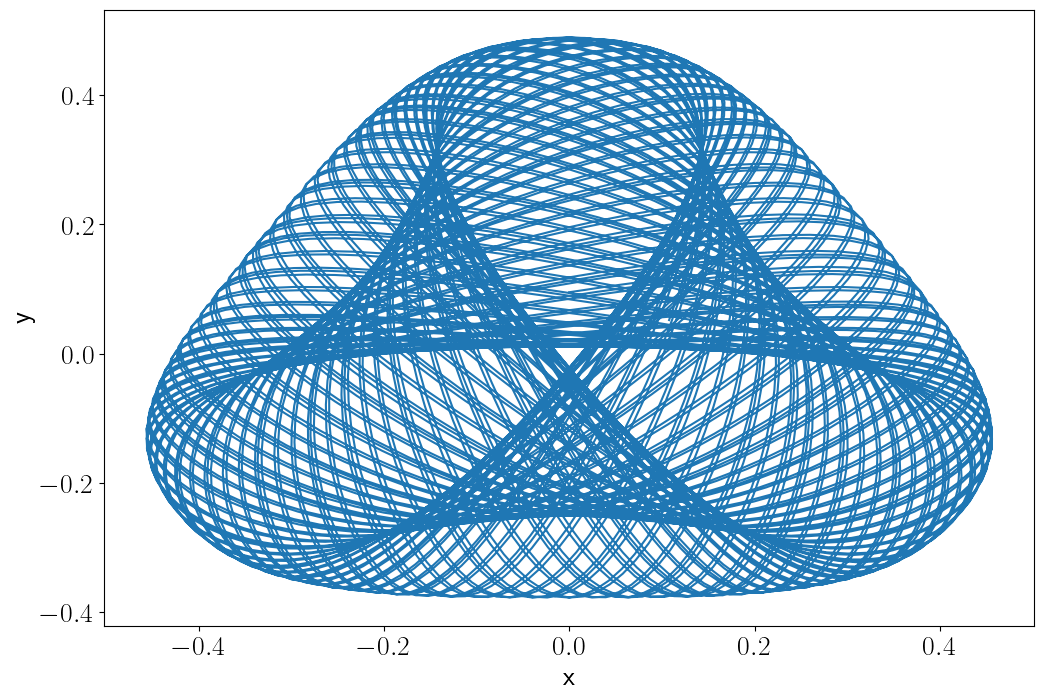

In [6]:
E       = 0.1
x0      = 0.0
y0      = 0.095
py0     = 0.096
t_span  = (0, 800)
dt      = 0.1
t, traj = trajectory(E, x0, y0, py0, t_span, dt, float)
xL, pxL, yL, pyL = traj[:,0], traj[:,1], traj[:,2], traj[:,3]

plt.figure(figsize=(12,8))
plt.plot(xL, yL, '-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

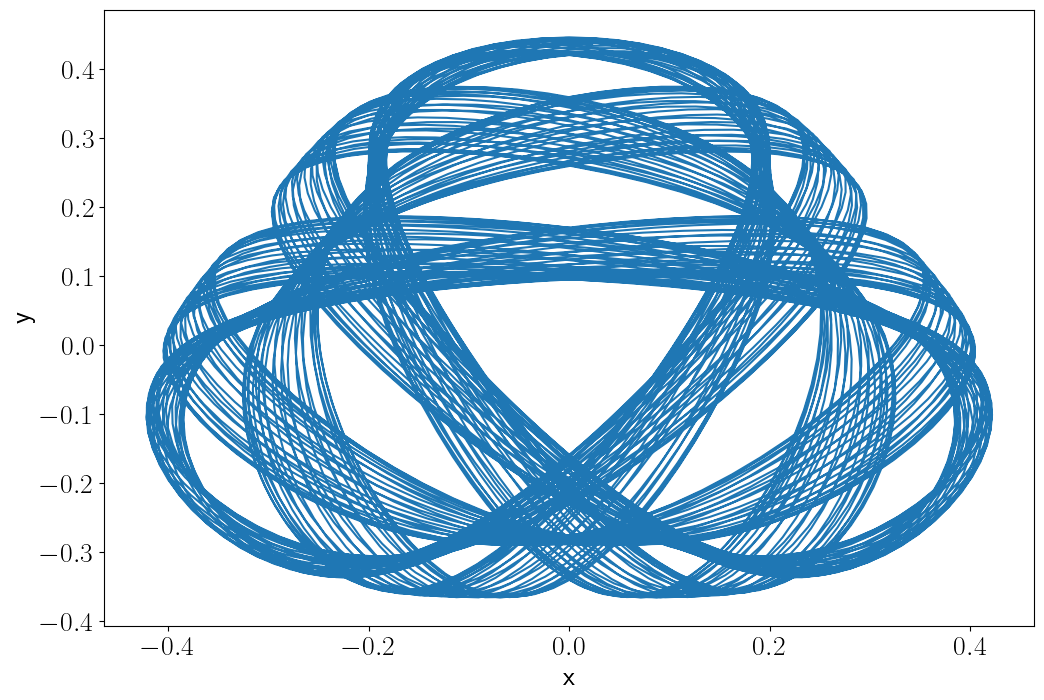

In [7]:
E       = 0.1
x0      = 0.0
y0      = 0.095
py0     = 0.03
t_span  = (0, 800)
dt      = 0.1
t, traj = trajectory(E, x0, y0, py0, t_span, dt, float)
xL, pxL, yL, pyL = traj[:,0], traj[:,1], traj[:,2], traj[:,3]

plt.figure(figsize=(12,8))
plt.plot(xL, yL, '-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

$\begin{align} \frac{dy}{dx}&=\frac{dt}{dx}\frac{dy}{dt}=\frac{1}{dx/dt}\frac{dy}{dt}=\frac{p_y}{p_x} \\ 
\frac{dp_x}{dx}&=\frac{dt}{dx}\frac{dp_x}{dt}=-\frac{1}{p_x}\frac{\partial V}{\partial x} \\
\frac{dp_y}{dx}&=\frac{dt}{dx}\frac{dp_y}{dt}=-\frac{1}{p_x}\frac{\partial V}{\partial y} \end{align}$

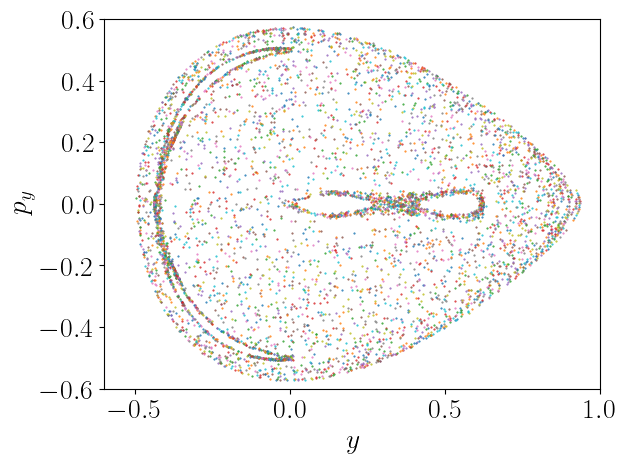

In [8]:
def get_section(trajectory, tol):
    yl_vals, py_vals = [],[]
    for i in range(1, len(trajectory)):
        if np.abs(trajectory[i, 0]) < tol:
            yl_vals.append(trajectory[i, 2])
            py_vals.append(trajectory[i, 3])
    return np.array([yl_vals]), np.array([py_vals])

def xsection_plot(E, x0, y0, py0, t_span, dt):
    t, traj = trajectory(E, x0, y0, py0, t_span, dt, float)
    return get_section(traj, tol=0.01)

E   = 1/6
x0  = 0.
y0  = 0.
py0 = 0.
dt  = 0.101
tsp = (0, 32000)

ypy = xsection_plot( E, x0, y0, py0, tsp, dt)
plt.plot(ypy[0], ypy[1], '.', markersize=1)
plt.xlabel(r'$y$')
plt.ylabel(r'$p_y$')
plt.xlim([-0.6, 1.0])
plt.ylim([-0.6, 0.6])
plt.show()

In [9]:
def xsection(E, x0, y0, py0, t_span, dt):
    t, traj = trajectory(E, x0, y0, py0, t_span, dt, complex)
    y  = traj[:, 2]
    py = traj[:, 3]
    x  = traj[:, 0]
    mask = np.abs(x) < 1e-3
    return y[mask], py[mask]

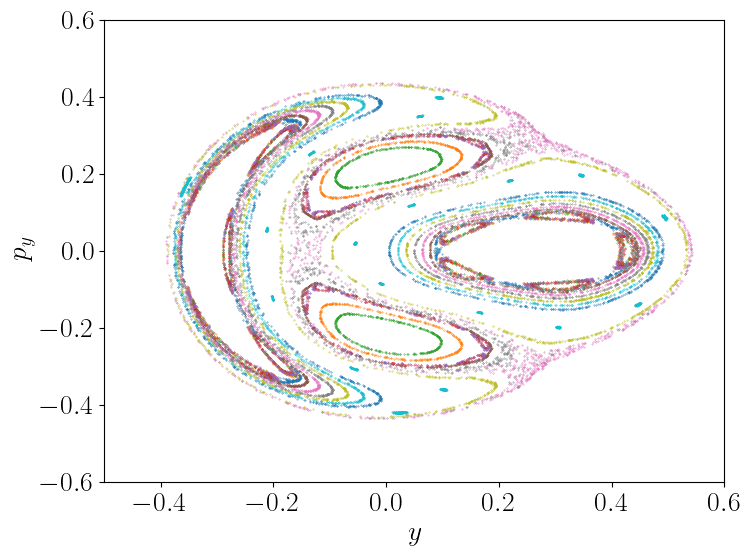

In [10]:
E      = 0.1
x0     = 0.0
y0     = 0.095
pyvals = [0.005, 0.02, 0.03, 0.032, 0.04, 0.05, 0.06, 0.07,0.08, 0.09, 0.1, 
          0.2, 0.25, 0.301, 0.302, 0.303, 0.32018, 0.3202, 0.33, 0.4]
t_span = (0, 50000)
dt     = 0.1

plt.figure(figsize=(8, 6))

for py0 in pyvals:
    y_section, py_section = xsection(E, x0, y0, py0, t_span, dt)
    plt.plot(y_section, py_section, '.', markersize=0.6)
plt.xlabel(r'$y$')
plt.ylabel(r'$p_y$')
plt.xlim(-0.5, 0.6)
plt.ylim(-0.6, 0.6)
plt.show()

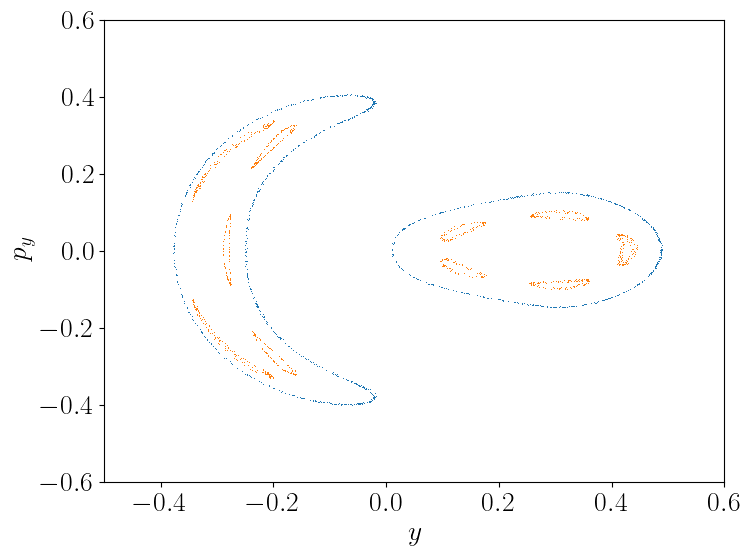

In [11]:
E      = 0.1
x0     = 0.0
y0     = 0.095
pyvals = [0.096, 0.03]
t_span = (0, 50000)
dt     = 0.1

plt.figure(figsize=(8, 6))
for py0 in pyvals:
    y_section, py_section = xsection(E, x0, y0, py0, t_span, dt)
    plt.plot(y_section, py_section, ',', markersize=2)
plt.xlabel(r'$y$')
plt.ylabel(r'$p_y$')
plt.xlim(-0.5, 0.6)
plt.ylim(-0.6, 0.6)
plt.show()

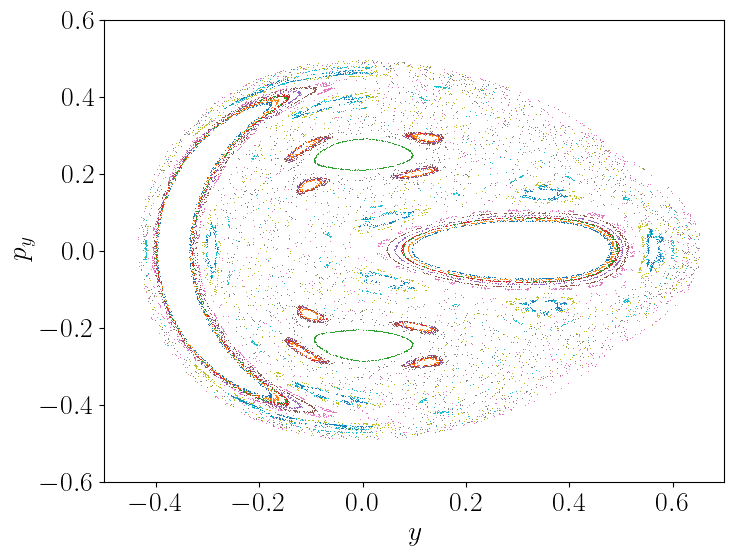

In [12]:
E      = 1/8
x0     = 0.0
y0     = 0.095
pyvals = [0.005, 0.02, 0.03, 0.032, 0.04, 0.05, 0.06, 0.07,0.08, 0.09, 0.1, 
          0.2, 0.25, 0.301, 0.302, 0.303, 0.32018, 0.3202, 0.33, 0.4]
t_span = (0, 50000)
dt     = 0.1

plt.figure(figsize=(8, 6))
for py0 in pyvals:
    y_section, py_section = xsection( E, x0, y0, py0, t_span, dt)
    plt.plot(y_section, py_section, ',', markersize=2)
plt.xlabel(r'$y$')
plt.ylabel(r'$p_y$')
plt.xlim(-0.5, 0.7)
plt.ylim(-0.6, 0.6)
plt.show()

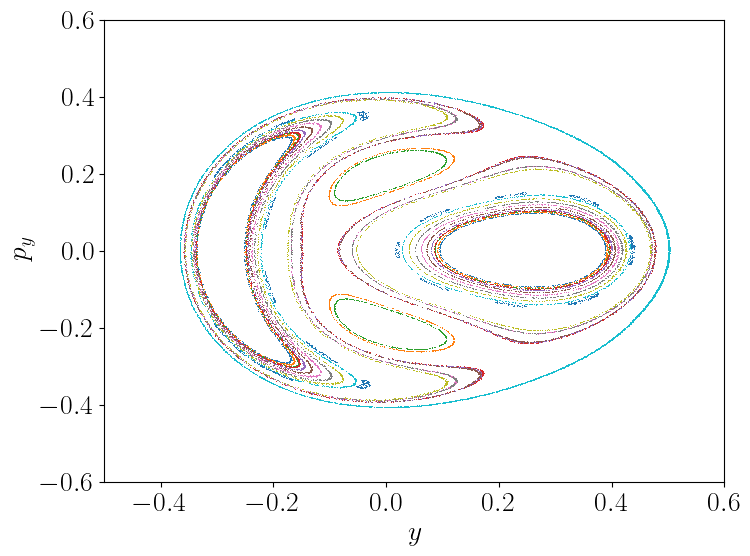

In [13]:
E      = 1/12
x0     = 0.0
y0     = 0.095
pyvals = [0.005, 0.02, 0.03, 0.032, 0.04, 0.05, 0.06, 0.07,0.08, 0.09, 0.1, 
          0.2, 0.25, 0.301, 0.302, 0.303, 0.32018, 0.3202, 0.33, 0.4]
t_span = (0, 50000)
dt     = 0.1

plt.figure(figsize=(8, 6))
for py0 in pyvals:
    y_section, py_section = xsection( E, x0, y0, py0, t_span, dt)
    plt.plot(y_section, py_section, ',', markersize=2)
plt.xlabel(r'$y$')
plt.ylabel(r'$p_y$')
plt.xlim(-0.5, 0.6)
plt.ylim(-0.6, 0.6)
plt.show()

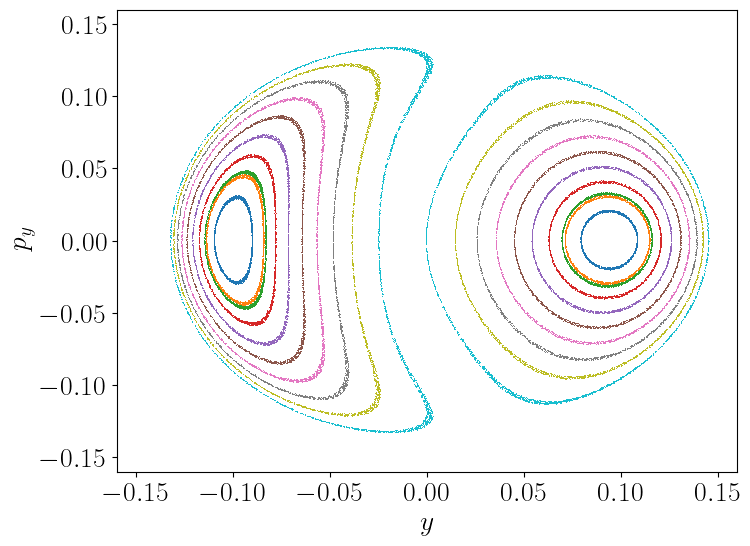

In [14]:
E      = 1/100
x0     = 0.0
y0     = 0.095
pyvals = [ 0.02, 0.03, 0.032, 0.04, 0.05, 0.06, 0.07,0.08, 0.09, 0.1, 0.301, 0.302, 0.303, 0.32018, 0.3202, 0.33, 0.4]
t_span = (0, 50000)
dt     = 0.1

plt.figure(figsize=(8, 6))
for py0 in pyvals:
    y_section, py_section = xsection( E, x0, y0, py0, t_span, dt)
    plt.plot(y_section, py_section, ',', markersize=2)
plt.xlabel(r'$y$')
plt.ylabel(r'$p_y$')
plt.xlim(-0.16, 0.16)
plt.ylim(-0.16, 0.16)
plt.show()

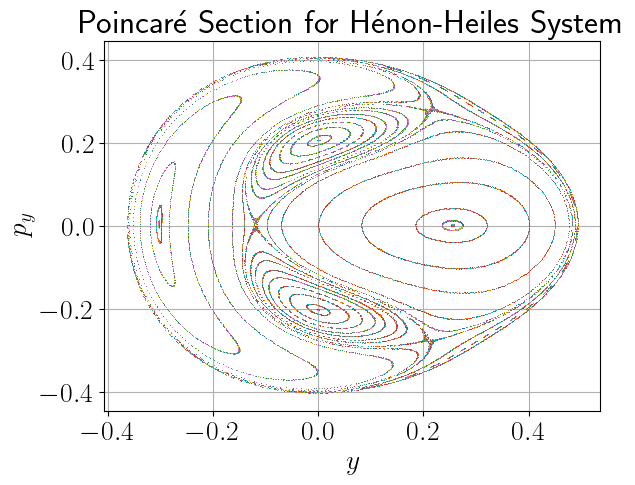

In [15]:
t_span = (0, 5000)
dt     = 1e-2
icv    = [[0, 0.4082401254164024,   0.000000000000000000,  0.0000000000000000   ],
          [0, 0.24008038662195985, -0.15316368171208566,   0.28838672839135326  ],
          [0, 0.24352018790129148,  0.09848498536170303,   0.3135210500944904   ],
          [0, 0.20788819727584018,  0.18687849877360435,   0.3047456328865395   ],
          [0, 0.11124773284074371,  0.24234454959281115,   0.32410152798705066  ],
          [0, 0.09612790055948518,  0.2562151235263743,    0.32091473672760257  ],
          [0, 0.14504873906640348,  0.2433184249171519,    0.3098719090788399   ],
          [0, 0.21466692008332666,  0.21341797098009158,   0.2855018063099425   ],
          [0, 0.2242200636897092,   0.21057030870037158,   0.27976766448196655  ],
          [0, 0.3683386516212832,   0.18778901046261137,   0.011696534024095057 ],
          [0, 0.3451153373835715,   0.23762310035771178,   0.005962392196119196 ],
          [0, 0.33504538978074816,  0.256132905175892,     0.0016617858251372995],
          [0, 0.37097564355830726, -0.03575247849541091,   0.1665183633794433   ],
          [0, 0.37507484064199426, -0.06280527015275122,   0.14788240243852177  ],
          [0, 0.3774580162329546,  -0.08416273725065143,   0.12924644149760023  ],
          [0, 0.3779249463635693,  -0.09982487978911159,   0.11491108692766056  ],
          [0, 0.3818158505457779,  -0.10979169776813169,   0.08910744870176919  ],
          [0, 0.3850735819245613,  -0.11406319118771174,   0.06617088138986574  ],
          [0, 0.3571135001050445,  -0.02151416709681081,   0.1966226079763166   ],
          [0, 0.3537329768656702,  -0.0015805311387706023, 0.20379028526128642  ]]

X_v, Y_v = [], []
y_events, py_events = [], []

for initial_conditions in icv:
    t, sol = RK4(henon_heilies, t_span, dt, initial_conditions, complex)
    x  = sol[:, 0].real
    y  = sol[:, 2].real
    py = sol[:, 3].real

    for i in range(1, len(t)):
        if x[i-1] * x[i] < 0:  # Detect zero-crossing
            y_events.append(y[i])
            py_events.append(py[i])
            plt.plot(y[i], py[i], ',', markersize=1)
plt.xlabel(r'$y$')
plt.ylabel(r'$p_y$')
plt.title('Poincaré Section for Hénon-Heiles System')
plt.grid(True)
plt.show()